In [1]:
%matplotlib inline
import numpy as np # n-dimensional array object & math functions
import pandas as pd # load data into dataframe
import sklearn #scikit-learn algorithms for machine learning
import scipy # scientific computing: linear algebra, optimization, signal processing, statistics
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # advanced statistical plots
import os

main_path = r"/Users/yourgrandpaprogenynamesmcky/Developer/BIG_DATA_AI/Data"
data_path = os.path.join(main_path, "HW2_Housing_Survey-661316-17367456509369.csv")
pdf_path = os.path.join(main_path, "HW2_Housing_Survey-661316-17367456876242.pdf")
if os.path.exists(data_path):
    dataframe_p = pd.read_csv(data_path)
    print("File loaded successfully!")
else:
    print("File not found:", data_path)

File loaded successfully!


In [2]:
dataframe_p["VAL"]

0       17.0
1        NaN
2       18.0
3       19.0
4       20.0
        ... 
6491     NaN
6492    16.0
6493     6.0
6494     NaN
6495     NaN
Name: VAL, Length: 6496, dtype: float64

1. How Many Properties are Worth $1,000,000 or More?

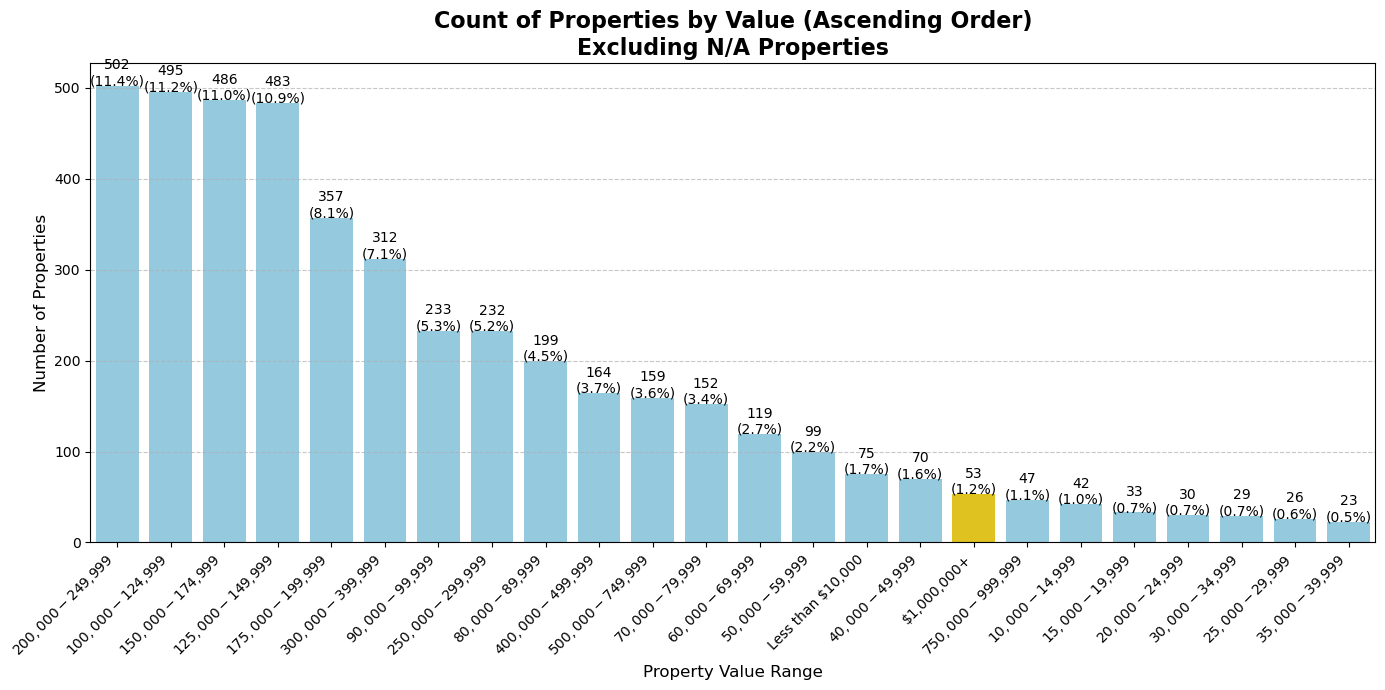

Count of properties worth $1,000,000+: 53 (1.20%)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataframe_p["VAL"] = dataframe_p["VAL"].fillna("bb").apply(lambda x: int(x) if x != "bb" else "bb").astype(str)

val_mapping = {
    "bb": "N/A",
    "1": "Less than $10,000",
    "2": "$10,000 - $14,999",
    "3": "$15,000 - $19,999",
    "4": "$20,000 - $24,999",
    "5": "$25,000 - $29,999",
    "6": "$30,000 - $34,999",
    "7": "$35,000 - $39,999",
    "8": "$40,000 - $49,999",
    "9": "$50,000 - $59,999",
    "10": "$60,000 - $69,999",
    "11": "$70,000 - $79,999",
    "12": "$80,000 - $89,999",
    "13": "$90,000 - $99,999",
    "14": "$100,000 - $124,999",
    "15": "$125,000 - $149,999",
    "16": "$150,000 - $174,999",
    "17": "$175,000 - $199,999",
    "18": "$200,000 - $249,999",
    "19": "$250,000 - $299,999",
    "20": "$300,000 - $399,999",
    "21": "$400,000 - $499,999",
    "22": "$500,000 - $749,999",
    "23": "$750,000 - $999,999",
    "24": "$1,000,000+"
}

dataframe_p["VAL_Range"] = dataframe_p["VAL"].map(val_mapping)

val_counts = dataframe_p["VAL_Range"].value_counts()
filtered_counts = val_counts.drop("N/A")
total_properties = filtered_counts.sum()

bar_data = filtered_counts.reset_index()
bar_data.columns = ["Property Value Range", "Count"]
bar_data["Percentage"] = (bar_data["Count"] / total_properties) * 100

plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(
    x="Property Value Range", 
    y="Count", 
    data=bar_data, 
    palette=[
        "skyblue" if val != "$1,000,000+" else "gold" 
        for val in bar_data["Property Value Range"]
    ]
)

for index, row in bar_data.iterrows():
    bar_plot.text(
        index, 
        row["Count"] + 0.5, 
        f'{int(row["Count"])}\n({row["Percentage"]:.1f}%)', 
        ha="center", 
        fontsize=10
    )

# Customize the chart
plt.title("Count of Properties by Value (Ascending Order)\nExcluding N/A Properties", fontsize=16, weight="bold")
plt.ylabel("Number of Properties", fontsize=12)
plt.xlabel("Property Value Range", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

million_or_more_count = filtered_counts.get("$1,000,000+", 0)
million_percentage = (million_or_more_count / total_properties) * 100
print(f"Count of properties worth $1,000,000+: {million_or_more_count} ({million_percentage:.2f}%)")

In [25]:
print(filtered_counts)
print(bar_data)

VAL
Less than $10,000    0
$10,000–14,999       0
$15,000–19,999       0
$20,000–24,999       0
$25,000–29,999       0
$30,000–34,999       0
$35,000–39,999       0
$40,000–49,999       0
$50,000–59,999       0
$60,000–69,999       0
$70,000–79,999       0
$80,000–89,999       0
$90,000–99,999       0
$100,000–124,999     0
$125,000–149,999     0
$150,000–174,999     0
$175,000–199,999     0
$200,000–249,999     0
$250,000–299,999     0
$300,000–399,999     0
$400,000–499,999     0
$500,000–749,999     0
$750,000–999,999     0
$1,000,000+          0
Name: count, dtype: int64
   Property Value Range  Count
0     Less than $10,000      0
1        $10,000–14,999      0
2        $15,000–19,999      0
3        $20,000–24,999      0
4        $25,000–29,999      0
5        $30,000–34,999      0
6        $35,000–39,999      0
7        $40,000–49,999      0
8        $50,000–59,999      0
9        $60,000–69,999      0
10       $70,000–79,999      0
11       $80,000–89,999      0
12       $90,00

2. How Many People Are Recorded in a House on Average?

Average Number of People per House: 2.30
Total Number of Houses: 6496
Minimum Household Size: 0
Maximum Household Size: 11


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


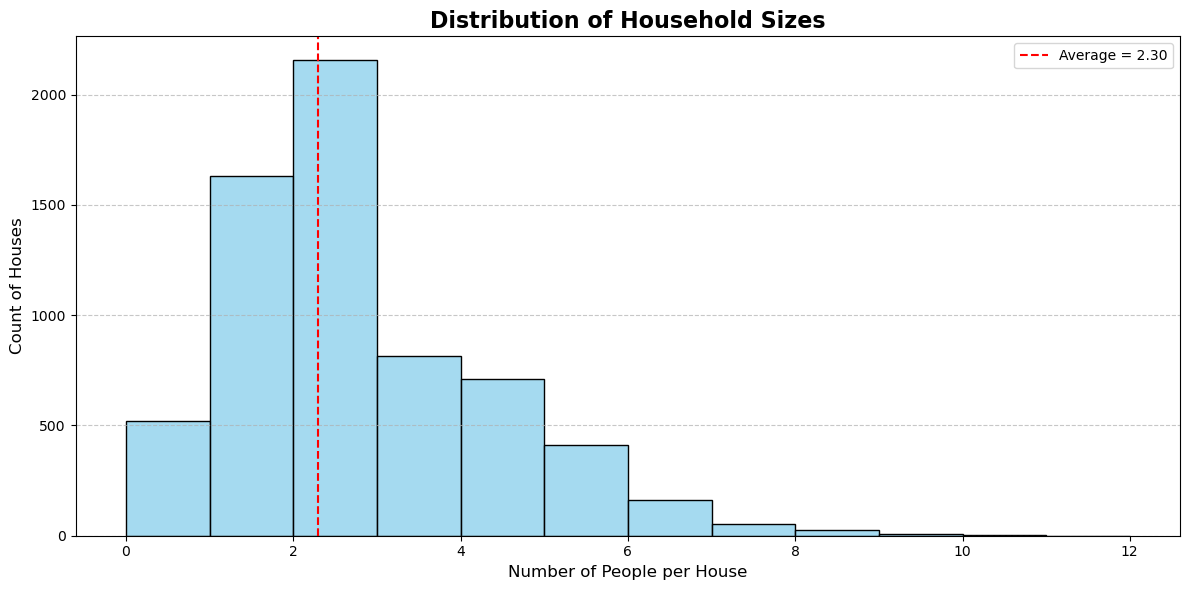

In [73]:
np_data = dataframe_p["NP"].dropna()
np_data = np_data.astype(int)

average_people = np_data.mean()
min_people = np_data.min()
max_people = np_data.max()
total_houses = len(np_data)

print(f"Average Number of People per House: {average_people:.2f}")
print(f"Total Number of Houses: {total_houses}")
print(f"Minimum Household Size: {min_people}")
print(f"Maximum Household Size: {max_people}")

plt.figure(figsize=(12, 6))
sns.histplot(np_data, bins=range(min_people, max_people + 2), kde=False, color="skyblue")
plt.axvline(average_people, color="red", linestyle="--", label=f"Average = {average_people:.2f}")
plt.title("Distribution of Household Sizes", fontsize=16, weight="bold")
plt.xlabel("Number of People per House", fontsize=12)
plt.ylabel("Count of Houses", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

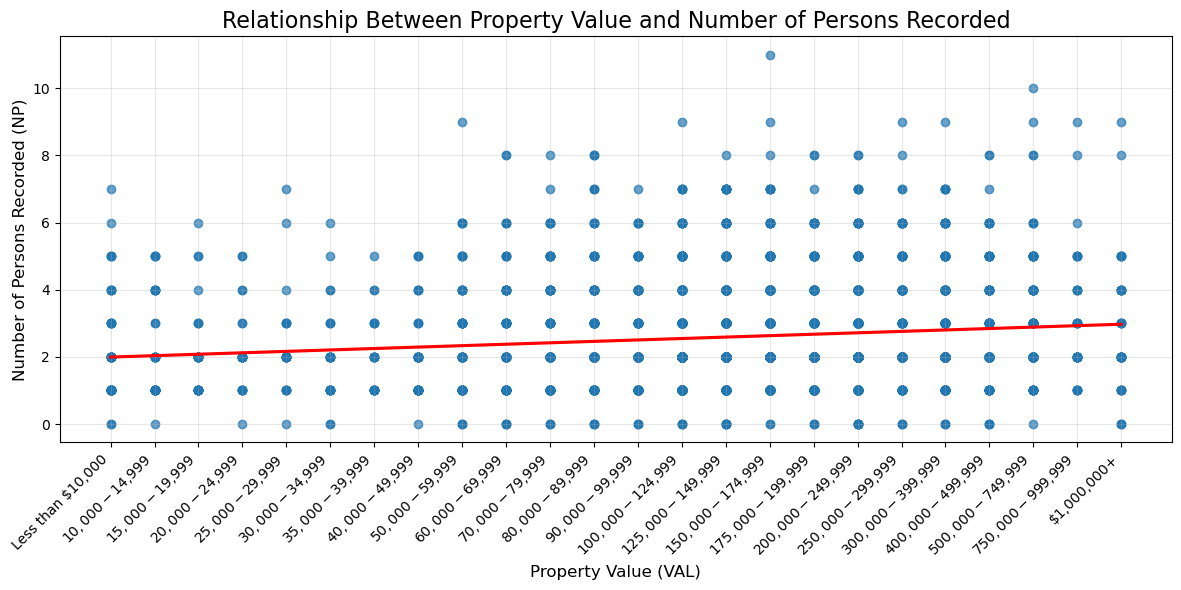

In [77]:
dataframe_p['VAL_label'] = dataframe_p['VAL'].map(val_mapping)

plt.figure(figsize=(12, 6))

sns.regplot(
    data=dataframe_p, 
    x='VAL', 
    y='NP', 
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'},
    ci=None
)

unique_vals = dataframe_p['VAL'].unique()

plt.xticks(
    ticks=unique_vals, 
    labels=[val_mapping[str(i)] for i in unique_vals], 
    rotation=45, 
    ha='right'
)

plt.title("Relationship Between Property Value and Number of Persons Recorded", fontsize=16)
plt.xlabel("Property Value (VAL)", fontsize=12)
plt.ylabel("Number of Persons Recorded (NP)", fontsize=12)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

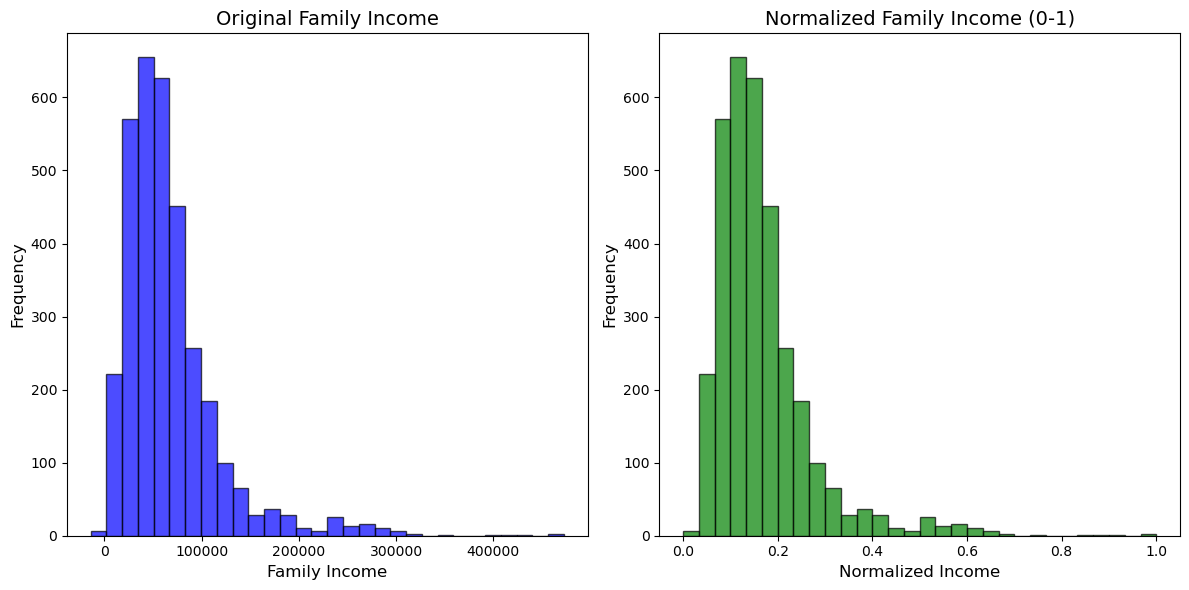

In [82]:
dataframe_p['FINCP'] = pd.to_numeric(dataframe_p['FINCP'], errors='coerce')

dataframe_p = dataframe_p.dropna(subset=['FINCP'])

fincp_min = dataframe_p['FINCP'].min()
fincp_max = dataframe_p['FINCP'].max()
dataframe_p['FINCP_Normalized'] = (dataframe_p['FINCP'] - fincp_min) / (fincp_max - fincp_min)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dataframe_p['FINCP'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Original Family Income', fontsize=14)
plt.xlabel('Family Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(dataframe_p['FINCP_Normalized'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Normalized Family Income (0-1)', fontsize=14)
plt.xlabel('Normalized Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

              Count  Percentage
FINCP_Binned                   
Very Low       3219   79.461861
Low             702   17.329055
Medium          103    2.542582
High             21    0.518391
Very High         6    0.148112


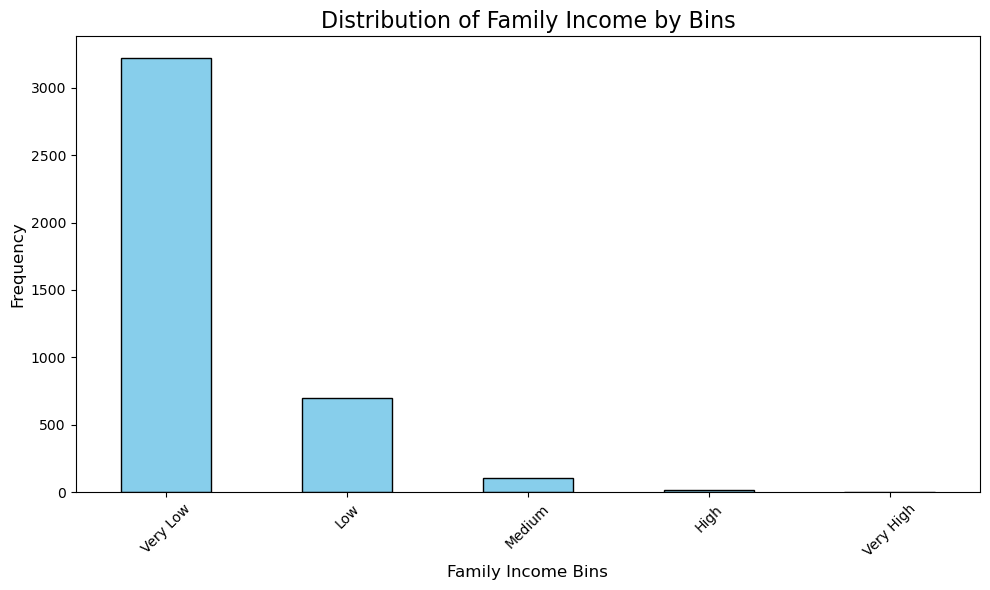

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe_p['FINCP'] = pd.to_numeric(dataframe_p['FINCP'], errors='coerce')
dataframe_p = dataframe_p.dropna(subset=['FINCP'])

bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
dataframe_p['FINCP_Binned'] = pd.cut(
    dataframe_p['FINCP'],
    bins=5,
    labels=bin_labels,
    include_lowest=True
)

bin_counts = dataframe_p['FINCP_Binned'].value_counts().sort_index()
bin_percentages = (bin_counts / bin_counts.sum()) * 100

bin_summary = pd.DataFrame({
    'Count': bin_counts,
    'Percentage': bin_percentages
})

print(bin_summary)

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Family Income by Bins', fontsize=16)
plt.xlabel('Family Income Bins', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [4]:
dataframe_p['FINCP']

0       105600.0
1            NaN
2         9400.0
3        66000.0
4        93000.0
          ...   
6491     -2600.0
6492     53200.0
6493     18000.0
6494     33000.0
6495     32600.0
Name: FINCP, Length: 6496, dtype: float64

In [ ]:
# Please answer the following question: (better in pictures)

# • How many properties are worth $1,000,000 or more?

"""
1. How Many Properties are Worth $1,000,000 or More?
	•	Extract the VAL (Property Value) data
	•	Identify entries with a value corresponding to $1,000,000+.
"""

# • How many people recorded in a house on average?

"""
2. How Many People Are Recorded in a House on Average?
	•	Extract the NP (Number of Persons) data 
	•	Compute the average number of persons per house.
"""

# • Draw a graph to show the relationship between the property value and the number of persons recorded?

"""
3. Draw a Graph to Show the Relationship Between Property Value and the Number of Persons Recorded
	•	Map VAL (Property Value) and NP (Number of Persons) for each record.
	•	Create a scatter plot.
"""

# • Normalize family income into a range (0~1). Compare before vs after in histogram.

"""
4. Normalize Family Income Into a Range (0~1). Compare Before vs After in Histogram
	•	Extract FINCP (Family Income) data.
	•	Normalize it using Min-Max scaling.
	•	Plot histograms of original and normalized income.
"""

# • Create 5 bins for family income.

"""
5. Create 5 Bins for Family Income
	•	Divide the FINCP data into 5 bins using pandas.cut().
"""